<a href="https://colab.research.google.com/github/plaban1981/DL_guided_Project/blob/main/neural_network_on_higgs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Upload Data

In [1]:
from google.colab import files
files.upload()

Saving Higgs Boson.zip to Higgs Boson.zip


In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
!unzip "/content/Higgs Boson.zip" -d "/content/drive/MyDrive/DL_guided"

Archive:  /content/Higgs Boson.zip
   creating: /content/drive/MyDrive/DL_guided/Higgs Boson/
  inflating: /content/drive/MyDrive/DL_guided/Higgs Boson/Dataset Details.docx  
  inflating: /content/drive/MyDrive/DL_guided/Higgs Boson/Dataset Details.pdf  
   creating: /content/drive/MyDrive/DL_guided/Higgs Boson/Higgs Boson/
   creating: /content/drive/MyDrive/DL_guided/Higgs Boson/Higgs Boson/.git/
  inflating: /content/drive/MyDrive/DL_guided/Higgs Boson/Higgs Boson/.git/COMMIT_EDITMSG  
  inflating: /content/drive/MyDrive/DL_guided/Higgs Boson/Higgs Boson/.git/config  
  inflating: /content/drive/MyDrive/DL_guided/Higgs Boson/Higgs Boson/.git/description  
  inflating: /content/drive/MyDrive/DL_guided/Higgs Boson/Higgs Boson/.git/HEAD  
   creating: /content/drive/MyDrive/DL_guided/Higgs Boson/Higgs Boson/.git/hooks/
  inflating: /content/drive/MyDrive/DL_guided/Higgs Boson/Higgs Boson/.git/hooks/applypatch-msg.sample  
  inflating: /content/drive/MyDrive/DL_guided/Higgs Boson/Higgs 

In [2]:
import pandas as pd
import numpy as np


In [8]:
df = pd.read_csv('/content/drive/MyDrive/DL_guided/Higgs Boson/Higgs Boson/Dataset/training.csv')


In [9]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [10]:
df = df[['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet','Label']]

In [11]:
X = df.drop(columns=['Label'])
y = df['Label']

y = y.replace('s',0)
y = y.replace('b',1)
X = X.values
y = y.values

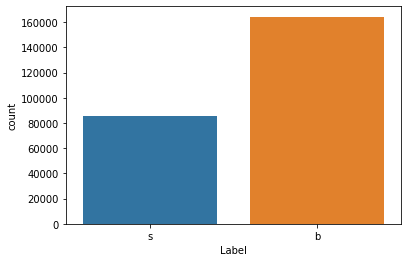

In [17]:
import seaborn as sns
sns.countplot(x='Label',data=df)

In [12]:
import sklearn

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [14]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [15]:
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=7, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [16]:
model = create_baseline()

In [18]:
history = model.fit(X_train,y_train,validation_data =(X_test,y_test), epochs=80)

Epoch 1/80
6250/6250 [==============================] - 13s 2ms/step - loss: 0.8534 - accuracy: 0.7104 - val_loss: 0.5346 - val_accuracy: 0.7366
Epoch 2/80
6250/6250 [==============================] - 15s 2ms/step - loss: 0.6023 - accuracy: 0.6947 - val_loss: 0.6273 - val_accuracy: 0.6870
Epoch 3/80
6250/6250 [==============================] - 11s 2ms/step - loss: 0.6421 - accuracy: 0.6589 - val_loss: 0.6444 - val_accuracy: 0.6550
Epoch 4/80
6250/6250 [==============================] - 13s 2ms/step - loss: 0.6426 - accuracy: 0.6579 - val_loss: 0.6447 - val_accuracy: 0.6550
Epoch 5/80
6250/6250 [==============================] - 12s 2ms/step - loss: 0.6426 - accuracy: 0.6579 - val_loss: 0.6444 - val_accuracy: 0.6550
Epoch 6/80
6250/6250 [==============================] - 10s 2ms/step - loss: 0.6426 - accuracy: 0.6579 - val_loss: 0.6443 - val_accuracy: 0.6550
Epoch 7/80
6250/6250 [==============================] - 10s 2ms/step - loss: 0.6426 - accuracy: 0.6579 - val_loss: 0.6444 - val_ac

In [22]:
tf.keras.models.save_model(model,'/content/drive/MyDrive/DL_guided/Higgs Boson/Higgs Boson/Notebooks/Higgs_1.h5')

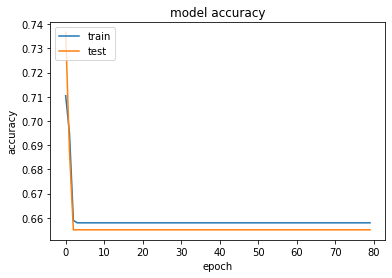

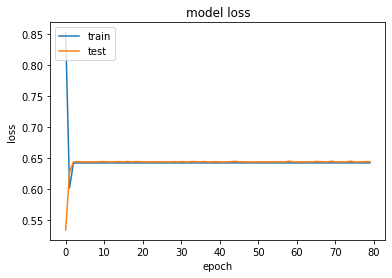

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
model.predict(X_test)

array([[0.6656641],
       [0.6656641],
       [0.6656641],
       ...,
       [0.6656641],
       [0.6656641],
       [0.6656641]], dtype=float32)

## Predict on unseen data

In [23]:
def prediction(model,input):
    prediction = model.predict(input)
    return 's' if prediction[0][0] >= 0.5 else 'b'

prediction(model,np.array([[121.052,   0.185,  79.164, 152.136,   1.571, 125.702,  -0.348]]))


's'

In [ ]:
model = tf.keras.models.load_model('Higgs.h5')
